<a href="https://colab.research.google.com/github/ainesko/ML_HW/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SVM и его ядра
Суммарное количество баллов: 10

#Задание 1 (7 баллов)
В этом задании вам не нужно будет реализовать SVM, а научиться его применять.

Примените метод SVM (например, из библиотеки sklearn) для датасета blobs2.

Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [1]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import seaborn as sns
import pylab as pl
import pandas as pd
from matplotlib.pyplot import figure
import numpy as np

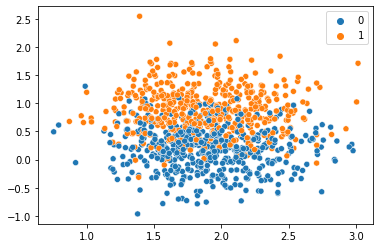

In [61]:
X_blobs2, y_blobs2  = make_blobs(n_samples=1000, random_state=4, center_box=(-2, 2),cluster_std=0.4, centers=2)
sns.scatterplot(x=X_blobs2[:,0], y=X_blobs2[:,1], hue=y_blobs2)

Функция построения графика

In [72]:
N = round(0.7 * len(X_blobs2))
Xtrain = X_blobs2[:N]
Xtest = X_blobs2[N:]
ytrain = y_blobs2[:N]
ytest = y_blobs2[N:]

x_min, x_max = Xtest[:, 0].min() - 1, Xtest[:,0].max() + 1
y_min, y_max = ytest.min() - 1, ytest.max() + 1

In [73]:
def graph(y):
  figure(figsize=(3,2), dpi=200)
  c1 = pl.scatter(Xtest[y == 0, 0],Xtest[y == 0, 1],c='m', s=5)
  c2 = pl.scatter(Xtest[y == 1, 0],Xtest[y == 1, 1],c='b', s=5)
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),   np.arange(y_min, y_max, 0.01))
  Z = svc.predict(np.c_[xx.ravel(),  yy.ravel()])
  Z = Z.reshape(xx.shape)
  print(f'f1-score = {f1_score(ytest, y)}')
  pl.contour(xx, yy, Z)
  pl.axis('off')
  pl.legend([c1, c2], ['0', '1'])
  pl.show()

Линейное ядро

In [74]:
svc = SVC(kernel='linear')
svc.fit(Xtrain, ytrain)
y_pred = svc.predict(Xtest)

f1-score = 0.8118811881188119


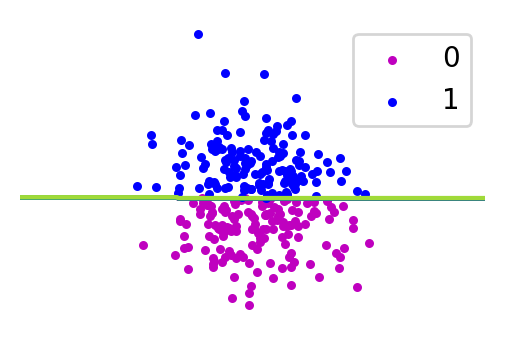

In [75]:
graph(y_pred)

Полиномиальное ядро степени 2

In [76]:
svc = SVC(kernel='poly', degree=2)
svc.fit(Xtrain, ytrain)
y_pred = svc.predict(Xtest)

f1-score = 0.8160535117056857


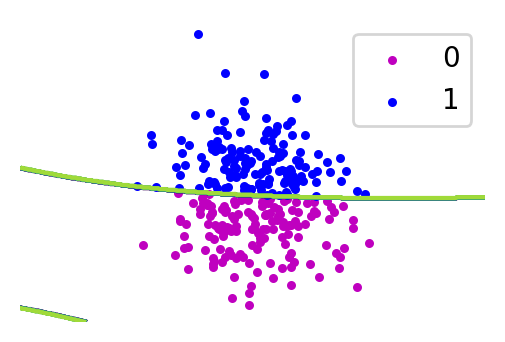

In [77]:
graph(y_pred)

Полиномиальное ядро степени 3

In [78]:
svc = SVC(kernel='poly', degree=3)
svc.fit(Xtrain, ytrain)
y_pred = svc.predict(Xtest)

f1-score = 0.8095238095238095


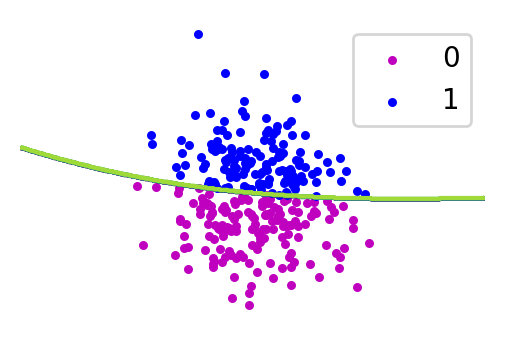

In [79]:
graph(y_pred)

Полиномиальное ядро степени 5

In [80]:
svc = SVC(kernel='poly', degree=5)
svc.fit(Xtrain, ytrain)
y_pred = svc.predict(Xtest)

f1-score = 0.7765567765567767


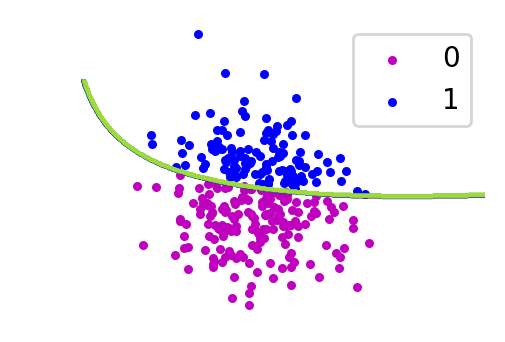

In [81]:
graph(y_pred)

RBF ядро

In [82]:
svc = SVC(kernel='rbf')
svc.fit(Xtrain, ytrain)
y_pred = svc.predict(Xtest)

f1-score = 0.8118811881188119


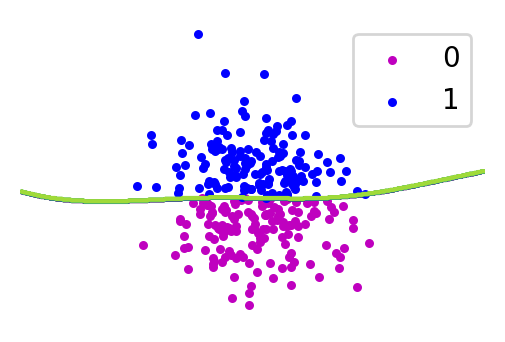

In [83]:
graph(y_pred)

#Задание 2 (3 балла)
Протестируйте SVM на датасете spam. Для этой задачи используйте данные x_spam_train и y_spam_train:

1. Выполните загрузку и предобработку файлов x_spam_train и y_spam_train.
2. Разбейте x_spam_train и y_spam_train на x_train, y_train, x_test и y_test для оценки точности работы алгоритма.
3. Посчитайте метрики precision, recall, accuracy для модели SVM. Если необходимо, попробуйте разные наборы параметров для получения лучшего результата.
4. Сравните время работы SVM и Random Forest при близкой точности.

Ответьте на следующие вопросы:

***Какой нужен препроцессинг данных для моделей?***

Удаляем столбец Id, в нём нет информации для получения результата


***Какая модель делает предсказания лучше? Предположите, почему.***

Random Forest делает предсказание лучше, поскольку он рассматривает множество деревьев и делает предсказание с помощью его.


Сравнили время работы SVM(linear) и Random Forest с параметрами n_estimators=100, max_depth=6, которые дают f1-score = 0.908466819221968 и f1-score = 0.9075829383886257 соответственно (совпадают при округлении до третьего знака):

SVM: 3min 57s

Random Forest: 577 ms

Видим, что случайный лес работает в сотни (даже больше, но порядки - это сложно :) ) раз быстрее

In [23]:
x_spam = pd.read_csv('https://raw.githubusercontent.com/ainesko/ML_HW/main/x_spam_train.csv').drop('Id', axis=1)
y_spam = pd.read_csv('https://raw.githubusercontent.com/ainesko/ML_HW/main/y_spam_train.csv')['Expected']
#x_spam = pd.read_csv('../input/homework-svm-ib-22/x_spam_train.csv').drop('Id', axis=1)
#y_spam = pd.read_csv('../input/homework-svm-ib-22/y_spam_train.csv')['Expected']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(x_spam, y_spam, test_size=0.3)

In [25]:
%%timeit 
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

1 loop, best of 5: 3min 57s per loop


In [41]:
%%timeit 
forest = RandomForestClassifier(n_estimators=100, max_depth=6)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

1 loop, best of 5: 577 ms per loop


In [29]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [30]:
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
print(f'precision = {precision_score(y_test, y_pred)}')
print(f'recall = {recall_score(y_test, y_pred)}')
print(f'f1-score = {f1_score(y_test, y_pred)}')

accuracy = 0.927536231884058
precision = 0.9147465437788018
recall = 0.9022727272727272
f1-score = 0.908466819221968


In [39]:
forest = RandomForestClassifier(n_estimators=100, max_depth=6)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [40]:
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
print(f'precision = {precision_score(y_test, y_pred)}')
print(f'recall = {recall_score(y_test, y_pred)}')
print(f'f1-score = {f1_score(y_test, y_pred)}')

accuracy = 0.9293478260869565
precision = 0.948019801980198
recall = 0.8704545454545455
f1-score = 0.9075829383886257


Обучите модель на всех данных из x_spam_train и y_spam_train. Сделайте submit своего решения и получите значение f1_score не менее 0.6

In [ ]:
svc = SVC(kernel='linear')
svc.fit(x_spam, y_spam)
X_test = pd.read_csv('../input/homework-svm-ib-22/x_spam_test.csv')

In [ ]:
submission = pd.DataFrame(columns = ["Id", "Expected"])
submission["Id"] = X_test["Id"]
submission["Expected"] = svc.predict(X_test.drop('Id', axis=1))
submission.to_csv('submission.csv', index=False)